# Variations in z-direction

*This notebook explores the variations in z-direction.*

Recall that each build contains eight 'anchors', i.e. specimen **not** included in the main study. These anchors are specimen rotated -90 degrees about the x-axis. All builds contain 45 defined positions in a 3x3x5 grid as displayed in the figure below. The anchors are found at **(2,3,z)** for all layers, and at **(3,1,z)** for layers 1, 3 and 5.


<img src="figs/layout_positions.png" width="600"/>

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [67]:
# Import libraries

import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from scipy import stats

import my_functions as func

In [4]:
"""
Retrieve all the data and sort it into a dictionary where each entry is a separate characteristic.

Key:   Name of the characteristic.
Value: DataFrame containing the measured values and the layout data.

"""

# Initiate a dictionary with characteristics and layout information
char_dict = func.make_char_dict()

## Cylindricity

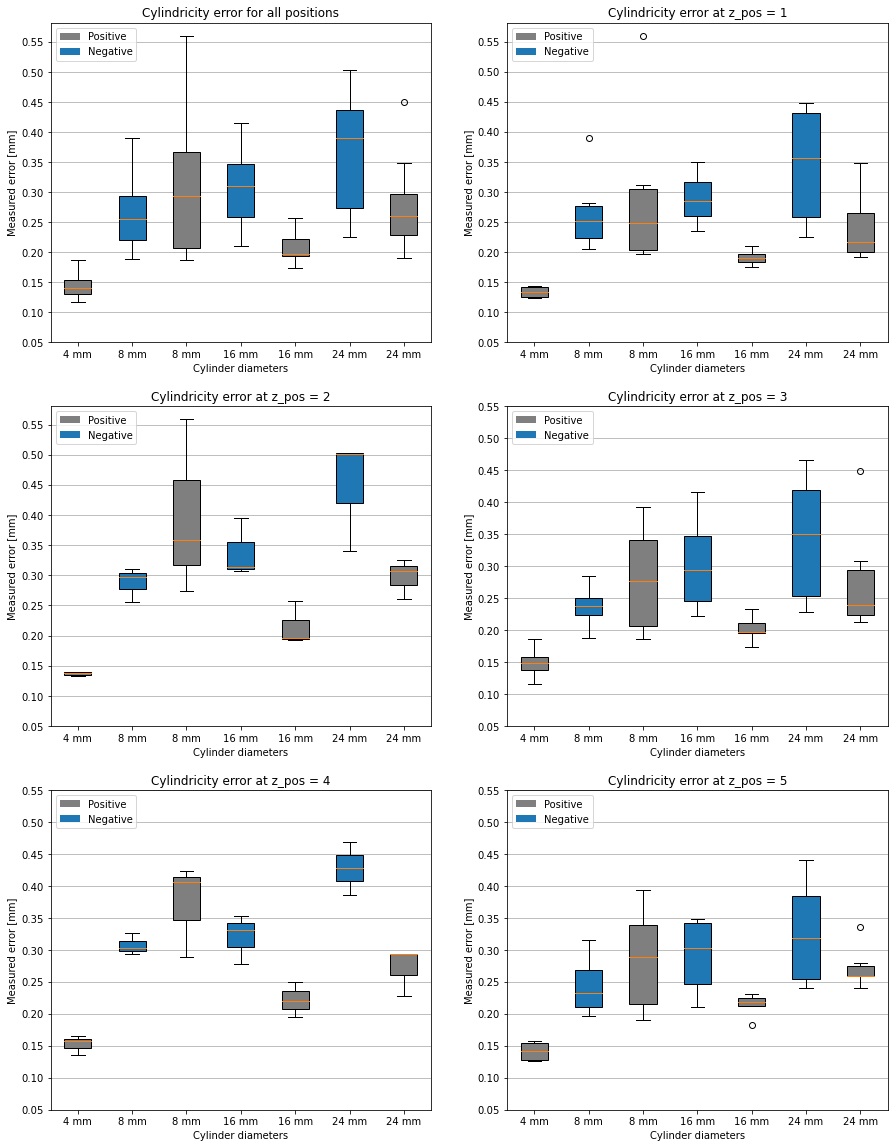

In [5]:
"""
Boxplots showing the variation in cylindricity of different dimensions of cylinders with respect to the z-height.

Only consider the 'reference specimen' rotated -90 degrees.

"""

## Prepare data
# List of characteristics
chars = ['Cylindricity_Cyl_4mm_Pos',\
        'Cylindricity_Cyl_8mm_Neg',\
        'Cylindricity_Cyl_8mm_Pos',\
        'Cylindricity_Cyl_16mm-Neg',\
        'Cylindricity_Cyl_16mm_Pos',\
        'Cylindricity_Cyl_24mm_Neg',\
        'Cylindricity_Cyl_24mm_Pos']

# Retrieve the characteristics from the dictionary
dfs = func.df_from_dict(chars, char_dict)

# Isolate the specimen rotated -90 degrees
dfs = func.get_single_values('angle', -90, dfs)

# First element of data-list contains all error values
data = [func.get_column('error', dfs)]

# Append to the data-list the z-layers one-by-one
for i in range(1,6):
    data.append(func.get_column('error', func.get_single_values('z_pos', i, dfs)))


## Create figure
# Initialize figure as a grid of plots
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 20))

# Initialize list of handles for legend
bplots = []

# Define colors
color1, color2 = 'tab:gray', 'tab:blue'

# Assign colors to boxes
colors = [color1, color2, color1, color2, color1, color2, color1]

# Define legend elements
legend_elements = [Patch(facecolor=color1, label='Positive'),\
                  Patch(facecolor=color2, label='Negative')]

# List of lables for the boxplots
labels = ['4 mm', '8 mm', '8 mm', '16 mm', '16 mm', '24 mm', '24 mm']

# Construct each plot
for i in range(3):
    for j in range(2):
        bplots.append(axs[i, j].boxplot(data[(i*2)+j], patch_artist=True, labels=labels))
        axs[i, j].set_title("Cylindricity error at z_pos = {}".format((i*2)+j))
        axs[i, j].legend(handles=legend_elements, loc='upper left')
        axs[i, j].set_yticks([0.05, .1, .15, .2, .25, .3, .35, .4, .45, .5, .55])
        axs[i, j].yaxis.grid(True)
        axs[i, j].set_xlabel("Cylinder diameters")
        axs[i, j].set_ylabel("Measured error [mm]")

# Set color to the boxplots
for bplot in bplots:
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# Revise title of first plot
axs[0, 0].set_title("Cylindricity error for all positions")


## Display figure
plt.show()

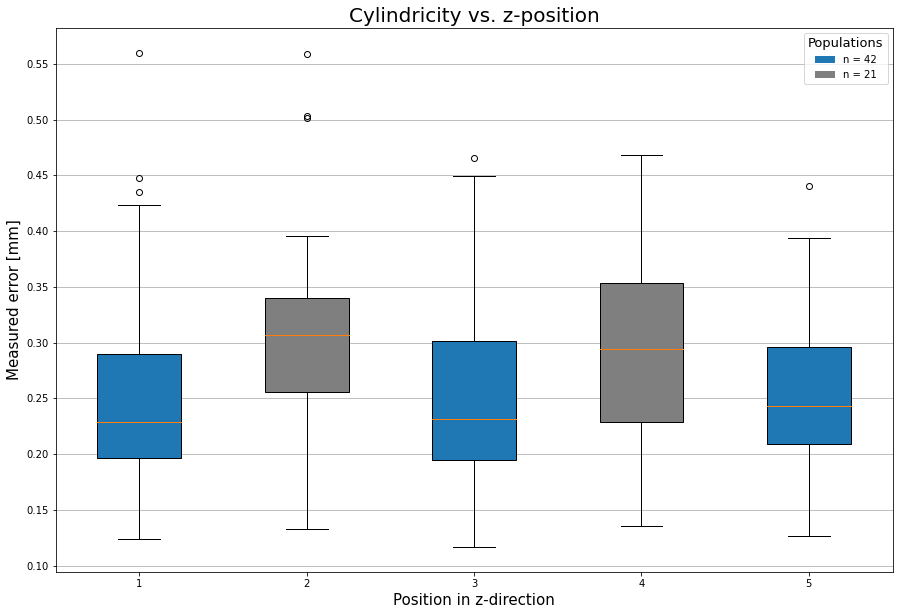

In [6]:
"""
Boxplots showing the variation in cylindricity of all cylinders with respect to z-height.

Only consider the 'reference specimen' rotated -90 degrees.

"""

## Prepare data
# List of characteristics
chars = ['Cylindricity_Cyl_4mm_Pos',\
        'Cylindricity_Cyl_8mm_Neg',\
        'Cylindricity_Cyl_8mm_Pos',\
        'Cylindricity_Cyl_16mm-Neg',\
        'Cylindricity_Cyl_16mm_Pos',\
        'Cylindricity_Cyl_24mm_Neg',\
        'Cylindricity_Cyl_24mm_Pos']

# List of lables for the boxplots
labels = ['1', '2', '3', '4', '5']

# Define colors
color1, color2 = 'tab:blue', 'tab:gray'

# Assign colors to boxes
colors = [color1, color2, color1, color2, color1]

# list of handles to the boxes
bplots = []

# Retrieve the characteristics from the dictionary
dfs = func.df_from_dict(chars, char_dict)

# Isolate the specimen rotated -90 degrees
dfs = func.get_single_values('angle', -90, dfs)

# Concatenate dataframes
dfs = pd.concat(dfs)

# Extract columns of interest
dfs = dfs[['error', 'z_pos']]

# Initiate empty list
data = [None] * 5

# Extract the z-layers into separate DataFrame-objects in the list 'data'
for i in range(5):
    data[i] = dfs[dfs['z_pos'] == i+1]
    data[i] = data[i]['error']

    
## Plot data
# Initialize figure
fig, ax = plt.subplots(figsize=(15, 10))

# Create boxplot
bplots = [ax.boxplot(data, patch_artist=True, labels=labels)]

# Set plot title
ax.set_title('Cylindricity vs. z-position', fontsize=20)

# Set color to the boxplots
for bplot in bplots:
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

        
## Configure axes
ax.set_yticks(np.arange(.1, .6, .05))
ax.yaxis.grid(True)

# Label the axes
ax.set_xlabel('Position in z-direction', fontsize=15)
ax.set_ylabel('Measured error [mm]', fontsize=15)


## Configure legend
# Define legend elements
legend_elements = [Patch(facecolor=color1, label='n = {}'.format(len(chars)*2*3)),\
                  Patch(facecolor=color2, label='n = {}'.format(len(chars)*3))]

# Apply legend
ax.legend(title='Populations', title_fontsize=13, handles=legend_elements, loc='upper right')


## Display plot
plt.show()

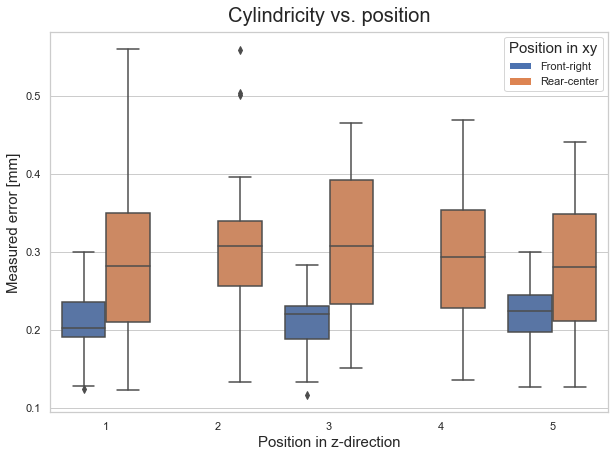

In [113]:
"""
Boxplots showing the variation in cylindricity of all cylinders with respect to z-height.

Only consider the 'reference specimen' rotated -90 degrees.

"""

## Prepare data
# List of characteristics
chars = ['Cylindricity_Cyl_4mm_Pos',\
        'Cylindricity_Cyl_8mm_Neg',\
        'Cylindricity_Cyl_8mm_Pos',\
        'Cylindricity_Cyl_16mm-Neg',\
        'Cylindricity_Cyl_16mm_Pos',\
        'Cylindricity_Cyl_24mm_Neg',\
        'Cylindricity_Cyl_24mm_Pos']

# Retrieve the characteristics from the dictionary
df = func.df_from_dict(chars, char_dict)

# Isolate the specimen rotated -90 degrees
df = func.get_single_values('angle', -90, df)

# Concatenate dataframes
df = pd.concat(df)

# Extract columns of interest
df = df[['error', 'z_pos', 'y_pos']]


## Plot data using seaborn module
# Define colors
colors = sns.color_palette()
sns.set_theme(style="whitegrid")

# Define the figure
fig = plt.figure(figsize=(10,7))

# Create boxplot
ax = sns.boxplot(data=df, x="z_pos", y="error", hue="y_pos", palette=None)

# Set plot title
ax.set_title("Cylindricity vs. position", fontsize=20, pad=10)

# Label the axes
ax.set_xlabel('Position in z-direction', fontsize=15)
ax.set_ylabel('Measured error [mm]', fontsize=15)


## Configure legend
# Define legend elements
legend_elements = [Patch(facecolor=colors[0], label='Front-right'),
                   Patch(facecolor=colors[1], label='Rear-center')]

# Define legend with title and elements
ax.legend(title='Position in xy', title_fontsize=15, handles=legend_elements)


## Display plot
plt.show()

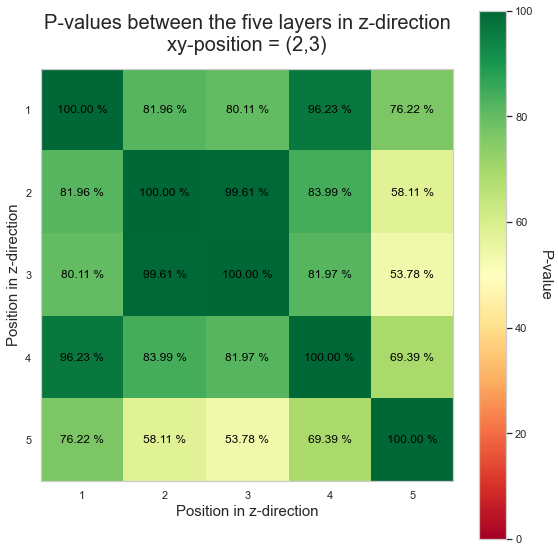

In [8]:
"""
Conduct T-test between all combinations of z-layers.

Only consider the 'reference specimen' at (2,3) in the xy-plane.

"""

## Retrieve and format data
# List of characteristics
chars = ['Cylindricity_Cyl_4mm_Pos',\
        'Cylindricity_Cyl_8mm_Neg',\
        'Cylindricity_Cyl_8mm_Pos',\
        'Cylindricity_Cyl_16mm-Neg',\
        'Cylindricity_Cyl_16mm_Pos',\
        'Cylindricity_Cyl_24mm_Neg',\
        'Cylindricity_Cyl_24mm_Pos']

# Retrieve the characteristics from the dictionary
df = func.df_from_dict(chars, char_dict)

# Concatenate dataframes
df = pd.concat(df)

# Isolate the position of the specimen
df = df[(df['x_pos'] == 2) & (df['y_pos'] == 3)]

# Extract columns of interest
df = df[['error', 'z_pos']]

# Conuct T-test and store P-values
df_p_vals = func.get_p_vals(df)

# Replace NA-values with ones and multiply show percent
df_p_vals.fillna(1, inplace=True)
df_p_vals = df_p_vals.applymap(lambda x: x*100)

# Set labels for all ticks
x_labels = df_p_vals.columns
y_labels = df_p_vals.index

# Set colormap-palette
cmap = "RdYlGn"

# Initialize figure
fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(df_p_vals, cmap=cmap, vmin=0, vmax=100)
ax.grid(False)

# Create colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("P-value", rotation=-90, va="bottom", fontsize=15)

# Show all ticks
ax.set_xticks(np.arange(len(x_labels)))
ax.set_yticks(np.arange(len(y_labels)))

# Label ticks according to table
ax.set_xticklabels(x_labels)
ax.set_yticklabels(y_labels)

# Label the axes
ax.set_xlabel('Position in z-direction', fontsize=15)
ax.set_ylabel('Position in z-direction', fontsize=15)

# Give title for plot
ax.set_title('P-values between the five layers in z-direction\n'+\
            'xy-position = (2,3)', fontsize=20, pad=18)

# Loop over data dimensions and create text annotations.
for i in range(len(x_labels)):
    for j in range(len(y_labels)):
        ax.text(j, i, "{:.2f} %".format(df_p_vals.iloc[i,j]),
               ha="center", va="center", color="black")

fig.tight_layout()
plt.show()

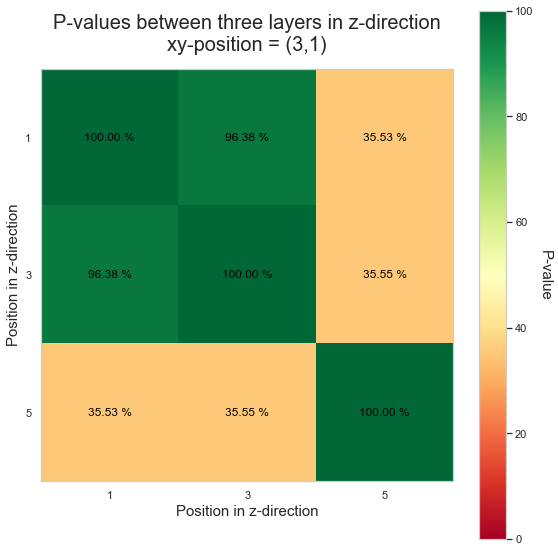

In [9]:
"""
Conduct T-test between all combinations of z-layers.

Only consider the 'reference specimen' at (3,1) in the xy-plane.

"""

## Retrieve and format data
# List of characteristics
chars = ['Cylindricity_Cyl_4mm_Pos',\
        'Cylindricity_Cyl_8mm_Neg',\
        'Cylindricity_Cyl_8mm_Pos',\
        'Cylindricity_Cyl_16mm-Neg',\
        'Cylindricity_Cyl_16mm_Pos',\
        'Cylindricity_Cyl_24mm_Neg',\
        'Cylindricity_Cyl_24mm_Pos']

# Retrieve the characteristics from the dictionary
df = func.df_from_dict(chars, char_dict)

# Concatenate dataframes
df = pd.concat(df)

# Isolate the position of the specimen
df = df[(df['x_pos'] == 3) & (df['y_pos'] == 1) & (df['angle'] == -90)]

# Extract columns of interest
df = df[['error', 'z_pos']]

# Conuct T-test and store P-values
df_p_vals = func.get_p_vals(df)

# Replace NA-values with ones and multiply show percent
df_p_vals.fillna(1, inplace=True)
df_p_vals = df_p_vals.applymap(lambda x: x*100)

# Set labels for all ticks
x_labels = df_p_vals.columns
y_labels = df_p_vals.index

# Set colormap-palette
cmap = "RdYlGn"

# Initialize figure
fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(df_p_vals, cmap=cmap, vmin=0, vmax=100)
ax.grid(False)

# Create colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("P-value", rotation=-90, va="bottom", fontsize=15)

# Show all ticks
ax.set_xticks(np.arange(len(x_labels)))
ax.set_yticks(np.arange(len(y_labels)))

# Label ticks according to table
ax.set_xticklabels(x_labels)
ax.set_yticklabels(y_labels)

# Label the axes
ax.set_xlabel('Position in z-direction', fontsize=15)
ax.set_ylabel('Position in z-direction', fontsize=15)

# Give title for plot
ax.set_title('P-values between three layers in z-direction\n'+\
            'xy-position = (3,1)', fontsize=20, pad=18)

# Loop over data dimensions and create text annotations.
for i in range(len(x_labels)):
    for j in range(len(y_labels)):
        ax.text(j, i, "{:.2f} %".format(df_p_vals.iloc[i,j]),
               ha="center", va="center", color="black")
    
fig.tight_layout()
plt.show()

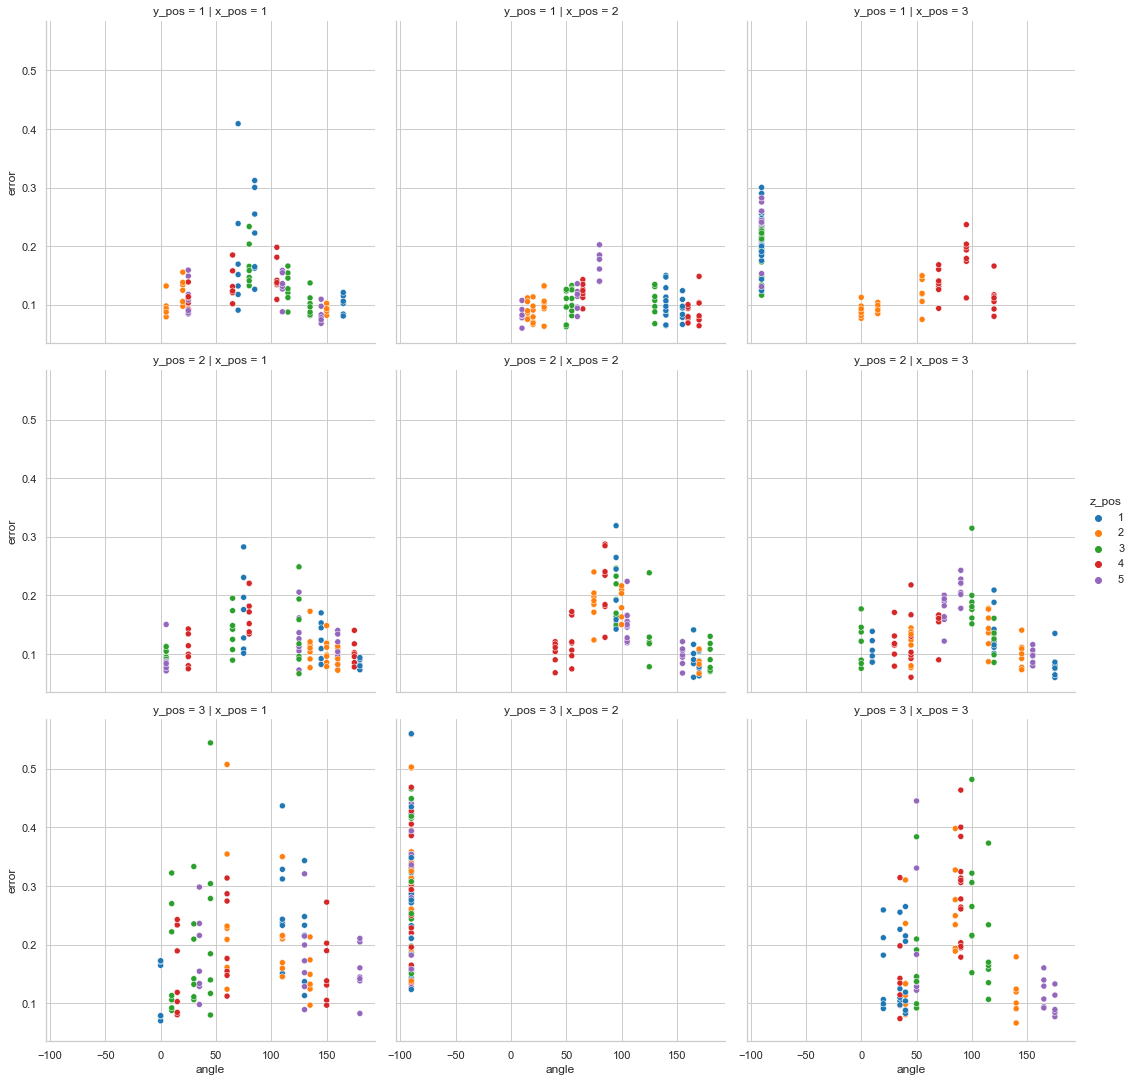

In [10]:
## Retrieve and format data
# List of characteristics
chars = ['Cylindricity_Cyl_4mm_Pos',\
        'Cylindricity_Cyl_8mm_Neg',\
        'Cylindricity_Cyl_8mm_Pos',\
        'Cylindricity_Cyl_16mm-Neg',\
        'Cylindricity_Cyl_16mm_Pos',\
        'Cylindricity_Cyl_24mm_Neg',\
        'Cylindricity_Cyl_24mm_Pos']

# Retrieve the characteristics from the dictionary
df = func.df_from_dict(chars, char_dict)

# Concatenate dataframes
df = pd.concat(df)

# Extract columns of interest
df = df[['error', 'angle', 'x_pos', 'y_pos', 'z_pos']]

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

sns.relplot(data=df, x="angle", y="error", hue='z_pos',
            col='x_pos', row='y_pos',
           palette=colors)

plt.show()

## Diameter

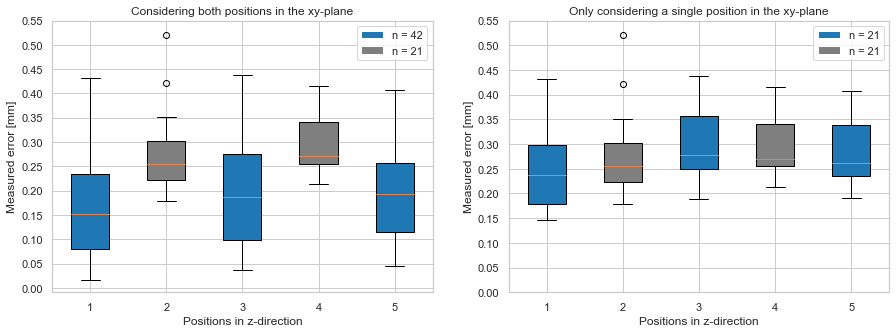

In [11]:
"""
Boxplots showing the variation in diameter of all cylinders with respect to z-height.

Only consider the 'reference specimen' rotated -90 degrees.

"""

# List of characteristics
chars = ['Diameter_Cyl_4mm_Pos',\
        'Diameter_Cyl_8mm_Neg',\
        'Diameter_Cyl_8mm_Pos',\
        'Diameter_Cyl_16mm_Neg',\
        'Diameter_Cyl_16mm_Pos',\
        'Diameter_Cyl_24mm_Neg',\
        'Diameter_Cyl_24mm_Pos']

# List of lables for the boxplots
labels = ['1', '2', '3', '4', '5']

# Define colors
color1, color2 = 'tab:blue', 'tab:gray'

# Assign colors to boxes
colors = [color1, color2, color1, color2, color1]

# Define legend elements
legend_elements = [Patch(facecolor=color1, label='n = {}'.format(len(chars)*2*3)),\
                  Patch(facecolor=color2, label='n = {}'.format(len(chars)*3))]

# list of handles to the boxes
bplots = []

# Retrieve the characteristics from the dictionary
dfs = func.df_from_dict(chars, char_dict)

# Isolate the specimen rotated -90 degrees
dfs = func.get_single_values('angle', -90, dfs)

# Concatenate dataframes
dfs = pd.concat(dfs)

# Extract columns of interest and converting to absolute values
dfs = dfs[['error', 'z_pos', 'y_pos']]
dfs['error'] = dfs['error'].abs()

# Copy for T-test
dft = dfs

# Initialize figure as a grid of plots
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))

# Make two plots
for i in [0, 1]:
    # Initiate empty list
    data = [None] * 5
    
    # Extract the z-layers into separate DataFrame-objects in the list 'data'
    for j in range(5):
        data[j] = dfs[dfs['z_pos'] == j+1]
        data[j] = data[j]['error']
    
    # Set up the plot
    bplots = [axs[i].boxplot(data, patch_artist=True, labels=labels)]
    axs[i].set_yticks([0, 0.05, .1, .15, .2, .25, .3, .35, .4, .45, .5, .55])
    axs[i].yaxis.grid(True)
    axs[i].set_xlabel("Positions in z-direction")
    axs[i].set_ylabel("Measured error [mm]")
    axs[i].set_title("Considering both positions in the xy-plane" if i == 0 else \
                 "Only considering a single position in the xy-plane")
    axs[i].legend(handles=legend_elements if i == 0 else \
                  [Patch(facecolor=color1, label='n = 21'), Patch(facecolor=color2, label='n = 21')], \
                  loc='upper right')
    
    # Set color to the boxplots
    for bplot in bplots:
        for patch, color in zip(bplot['boxes'], colors):
            patch.set_facecolor(color)
    
    # Remove the first row for the next iteration
    dfs = dfs[dfs['y_pos'] != 1]

# Display figure
plt.show()

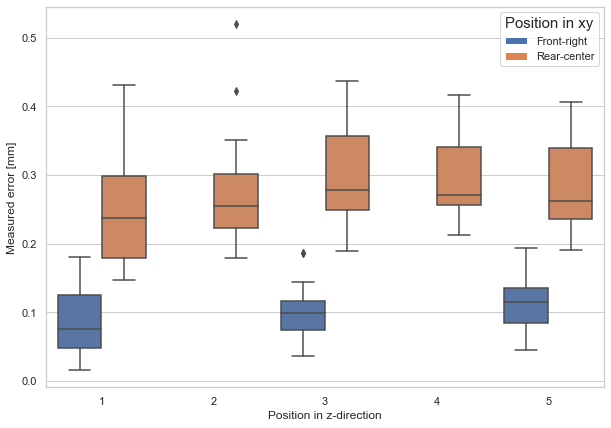

In [12]:
"""
Boxplots showing the variation in diameter of all cylinders with respect to z-height.

Only consider the 'reference specimen' rotated -90 degrees.

"""

## Prepare data
# List of characteristics
chars = ['Diameter_Cyl_4mm_Pos',\
        'Diameter_Cyl_8mm_Neg',\
        'Diameter_Cyl_8mm_Pos',\
        'Diameter_Cyl_16mm_Neg',\
        'Diameter_Cyl_16mm_Pos',\
        'Diameter_Cyl_24mm_Neg',\
        'Diameter_Cyl_24mm_Pos']

# Retrieve the characteristics from the dictionary
df = func.df_from_dict(chars, char_dict)

# Isolate the specimen rotated -90 degrees
df = func.get_single_values('angle', -90, df)

# Concatenate dataframes
df = pd.concat(df)

# Extract columns of interest and converting to absolute values
df = df[['error', 'z_pos', 'y_pos']]
df['error'] = df['error'].abs()


## Plot data using seaborn module
# Define colors
colors = sns.color_palette(palette=None, n_colors=2)

# Define the figure
fig = plt.figure(figsize=(10,7))

# Create box-plot
ax = sns.boxplot(data=df, x="z_pos", y="error", hue="y_pos", palette=None)

# Configure axes
ax.set(xlabel='Position in z-direction', ylabel='Measured error [mm]')


## Configure legend
# Define legend elements
legend_elements = [Patch(facecolor=colors[0], label='Front-right'),
                   Patch(facecolor=colors[1], label='Rear-center')]

# Define legend with title and elements
ax.legend(title='Position in xy', title_fontsize=15, handles=legend_elements)


# plt.savefig('plots/Diameter_anchor_positions.png', dpi=300, transparent=False, bbox_inches='tight')


## Display plot
plt.show()

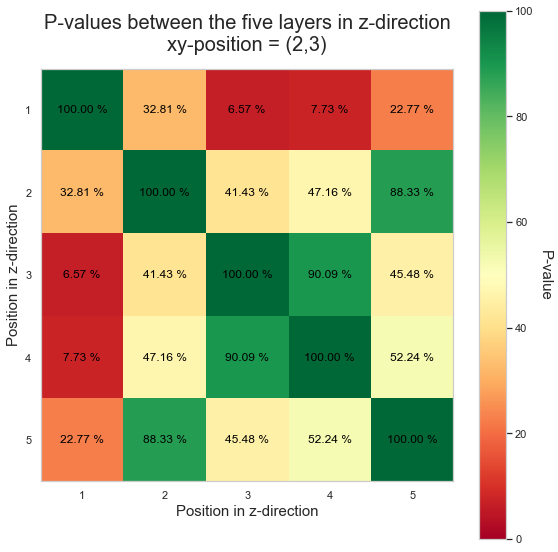

In [13]:
"""
Conduct T-test between all combinations of z-layers.

Only consider the 'reference specimen' at (2,3) in the xy-plane.

"""

## Retrieve and format data
# List of characteristics
chars = ['Diameter_Cyl_4mm_Pos',\
        'Diameter_Cyl_8mm_Neg',\
        'Diameter_Cyl_8mm_Pos',\
        'Diameter_Cyl_16mm_Neg',\
        'Diameter_Cyl_16mm_Pos',\
        'Diameter_Cyl_24mm_Neg',\
        'Diameter_Cyl_24mm_Pos']

# Retrieve the characteristics from the dictionary
df = func.df_from_dict(chars, char_dict)

# Concatenate dataframes
df = pd.concat(df)

# Isolate the position of the specimen
df = df[(df['x_pos'] == 2) & (df['y_pos'] == 3)]

# Extract columns of interest
df = df[['error', 'z_pos']]

# Convert to absolute error values
df['error'] = df['error'].abs()

# Conuct T-test and store P-values
df_p_vals = func.get_p_vals(df)

# Replace NA-values with ones and multiply show percent
df_p_vals.fillna(1, inplace=True)
df_p_vals = df_p_vals.applymap(lambda x: x*100)

# Set labels for all ticks
x_labels = df_p_vals.columns
y_labels = df_p_vals.index

# Set colormap-palette
cmap = "RdYlGn"

# Initialize figure
fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(df_p_vals, cmap=cmap, vmin=0, vmax=100)
ax.grid(False)

# Create colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("P-value", rotation=-90, va="bottom", fontsize=15)

# Show all ticks
ax.set_xticks(np.arange(len(x_labels)))
ax.set_yticks(np.arange(len(y_labels)))

# Label ticks according to table
ax.set_xticklabels(x_labels)
ax.set_yticklabels(y_labels)

# Label the axes
ax.set_xlabel('Position in z-direction', fontsize=15)
ax.set_ylabel('Position in z-direction', fontsize=15)

# Give title for plot
ax.set_title('P-values between the five layers in z-direction\n'+\
            'xy-position = (2,3)', fontsize=20, pad=18)

# Loop over data dimensions and create text annotations.
for i in range(len(x_labels)):
    for j in range(len(y_labels)):
        ax.text(j, i, "{:.2f} %".format(df_p_vals.iloc[i,j]),
               ha="center", va="center", color="black")

fig.tight_layout()
plt.show()

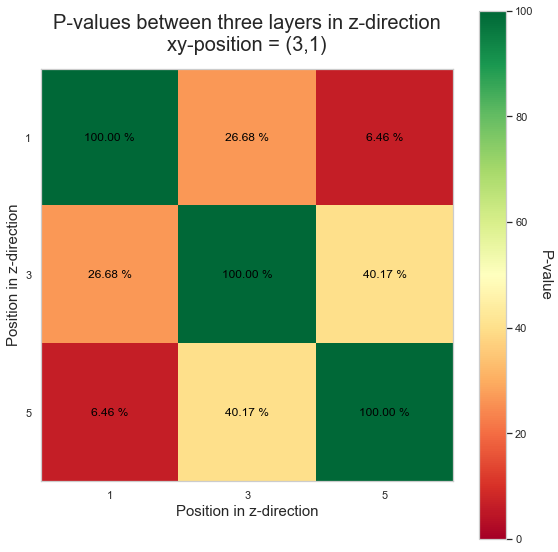

In [14]:
"""
Conduct T-test between all combinations of z-layers.

Only consider the 'reference specimen' at (3,1) in the xy-plane.

"""

## Retrieve and format data
# List of characteristics
chars = ['Diameter_Cyl_4mm_Pos',\
        'Diameter_Cyl_8mm_Neg',\
        'Diameter_Cyl_8mm_Pos',\
        'Diameter_Cyl_16mm_Neg',\
        'Diameter_Cyl_16mm_Pos',\
        'Diameter_Cyl_24mm_Neg',\
        'Diameter_Cyl_24mm_Pos']

# Retrieve the characteristics from the dictionary
df = func.df_from_dict(chars, char_dict)

# Concatenate dataframes
df = pd.concat(df)

# Isolate the position of the specimen
df = df[(df['x_pos'] == 3) & (df['y_pos'] == 1) & (df['angle'] == -90)]

# Extract columns of interest
df = df[['error', 'z_pos']]

# Convert to absolute error values
df['error'] = df['error'].abs()

# Conuct T-test and store P-values
df_p_vals = func.get_p_vals(df)

# Replace NA-values with ones and multiply show percent
df_p_vals.fillna(1, inplace=True)
df_p_vals = df_p_vals.applymap(lambda x: x*100)

# Set labels for all ticks
x_labels = df_p_vals.columns
y_labels = df_p_vals.index

# Set colormap-palette
cmap = "RdYlGn"

# Initialize figure
fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(df_p_vals, cmap=cmap, vmin=0, vmax=100)
ax.grid(False)

# Create colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("P-value", rotation=-90, va="bottom", fontsize=15)

# Show all ticks
ax.set_xticks(np.arange(len(x_labels)))
ax.set_yticks(np.arange(len(y_labels)))

# Label ticks according to table
ax.set_xticklabels(x_labels)
ax.set_yticklabels(y_labels)

# Label the axes
ax.set_xlabel('Position in z-direction', fontsize=15)
ax.set_ylabel('Position in z-direction', fontsize=15)

# Give title for plot
ax.set_title('P-values between three layers in z-direction\n'+\
            'xy-position = (3,1)', fontsize=20, pad=18)

# Loop over data dimensions and create text annotations.
for i in range(len(x_labels)):
    for j in range(len(y_labels)):
        ax.text(j, i, "{:.2f} %".format(df_p_vals.iloc[i,j]),
               ha="center", va="center", color="black")
    
fig.tight_layout()
plt.show()

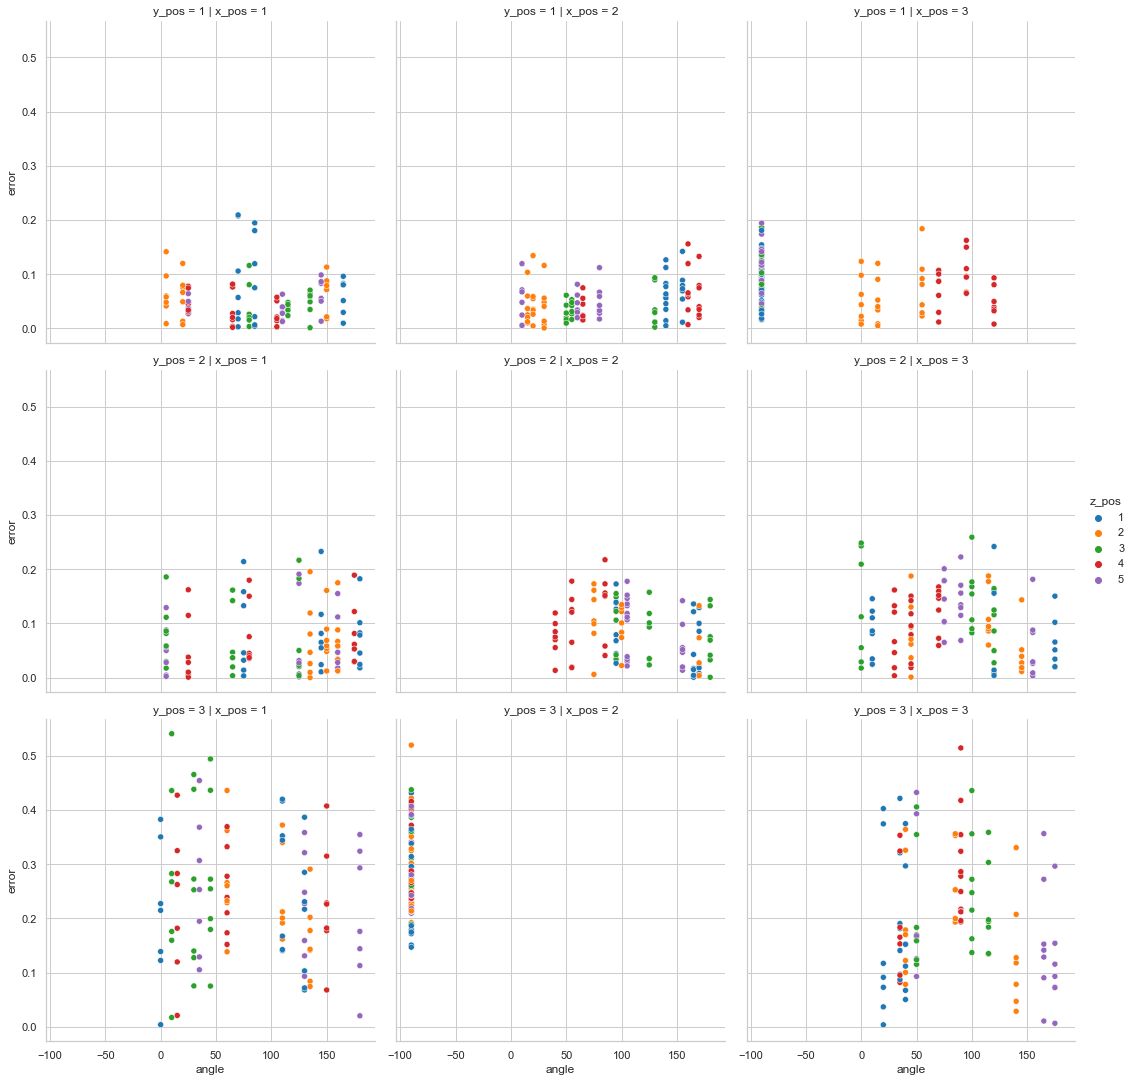

In [15]:
## Retrieve and format data
# List of characteristics
chars = ['Diameter_Cyl_4mm_Pos',\
        'Diameter_Cyl_8mm_Neg',\
        'Diameter_Cyl_8mm_Pos',\
        'Diameter_Cyl_16mm_Neg',\
        'Diameter_Cyl_16mm_Pos',\
        'Diameter_Cyl_24mm_Neg',\
        'Diameter_Cyl_24mm_Pos']

# Retrieve the characteristics from the dictionary
df = func.df_from_dict(chars, char_dict)

# Concatenate dataframes
df = pd.concat(df)

# Extract columns of interest
df = df[['error', 'angle', 'x_pos', 'y_pos', 'z_pos']]

# Convert to absolute error values
df['error'] = df['error'].abs()

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

sns.relplot(data=df, x="angle", y="error", hue='z_pos',
            col='x_pos', row='y_pos',
           palette=colors)

plt.show()

## Flatness

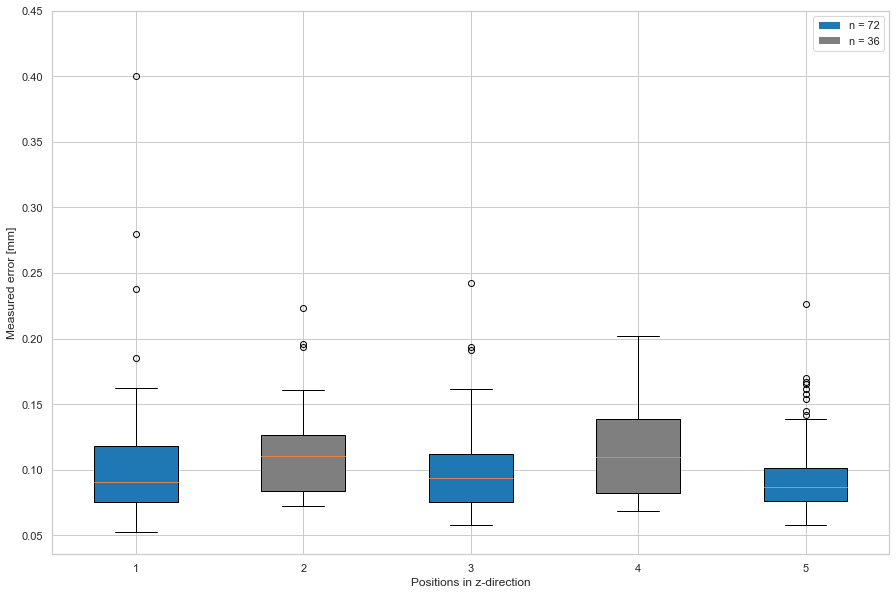

In [16]:
"""
Boxplots showing the variation in flatness of all HX-planes with respect to z-height.

Only consider the 'reference specimen' rotated -90 degrees.

"""

# List of characteristics
chars = ['Flatness_HX1_Plane1',\
        'Flatness_HX1_Plane2',\
        'Flatness_HX1_Plane3',\
        'Flatness_HX1_Plane4',\
        'Flatness_HX1_Plane5',\
        'Flatness_HX1_Plane6',\
        'Flatness_HX2_Plane1',\
        'Flatness_HX2_Plane2',\
        'Flatness_HX2_Plane3',\
        'Flatness_HX2_Plane4',\
        'Flatness_HX2_Plane5',\
        'Flatness_HX2_Plane6']

# List of lables for the boxplots
labels = ['1', '2', '3', '4', '5']

# Define colors
color1, color2 = 'tab:blue', 'tab:gray'

# Assign colors to boxes
colors = [color1, color2, color1, color2, color1]

# Define legend elements
legend_elements = [Patch(facecolor=color1, label='n = {}'.format(len(chars)*2*3)),\
                  Patch(facecolor=color2, label='n = {}'.format(len(chars)*3))]

# list of handles to the boxes
bplots = []

# Retrieve the characteristics from the dictionary
dfs = func.df_from_dict(chars, char_dict)

# Isolate the specimen rotated -90 degrees
dfs = func.get_single_values('angle', -90, dfs)

# Concatenate dataframes
dfs = pd.concat(dfs)

# Extract columns of interest
dfs = dfs[['error', 'z_pos']]

# Initiate empty list
data = [None] * 5

# Extract the z-layers into separate DataFrame-objects in the list 'data'
for i in range(5):
    data[i] = dfs[dfs['z_pos'] == i+1]
    data[i] = data[i]['error']
    
# Initialize figure
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))

bplots = [ax.boxplot(data, patch_artist=True, labels=labels)]
ax.set_yticks([0.05, .1, .15, .2, .25, .3, .35, .4, .45])
ax.yaxis.grid(True)
ax.legend(handles=legend_elements, loc='upper right')
ax.set_xlabel("Positions in z-direction")
ax.set_ylabel("Measured error [mm]")

# Set color to the boxplots
for bplot in bplots:
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# Display figure
plt.show()

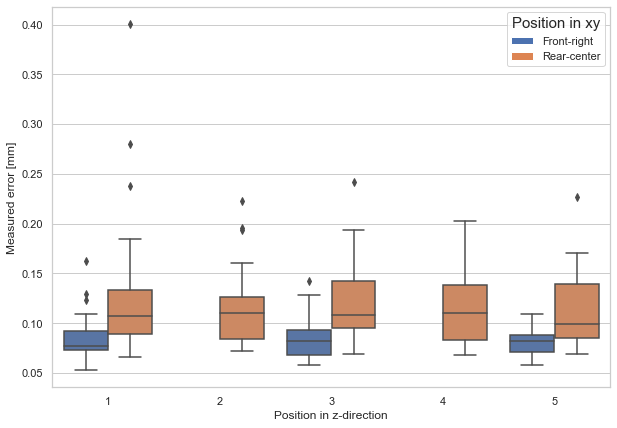

In [17]:
"""
Boxplots showing the variation in flatness of all HX-planes with respect to z-height.

Only consider the 'reference specimen' rotated -90 degrees.

"""

## Prepare data
# List of characteristics
chars = ['Flatness_HX1_Plane1',\
        'Flatness_HX1_Plane2',\
        'Flatness_HX1_Plane3',\
        'Flatness_HX1_Plane4',\
        'Flatness_HX1_Plane5',\
        'Flatness_HX1_Plane6',\
        'Flatness_HX2_Plane1',\
        'Flatness_HX2_Plane2',\
        'Flatness_HX2_Plane3',\
        'Flatness_HX2_Plane4',\
        'Flatness_HX2_Plane5',\
        'Flatness_HX2_Plane6']

# Retrieve the characteristics from the dictionary
df = func.df_from_dict(chars, char_dict)

# Isolate the specimen rotated -90 degrees
df = func.get_single_values('angle', -90, df)

# Concatenate dataframes
df = pd.concat(df)

# Extract columns of interest and converting to absolute values
df = df[['error', 'z_pos', 'y_pos']]


## Plot data using seaborn module
# Define colors
colors = sns.color_palette(palette=None, n_colors=2)

# Define the figure
fig = plt.figure(figsize=(10,7))

# Create box-plot
ax = sns.boxplot(data=df, x="z_pos", y="error", hue="y_pos", palette=None)

# Configure axes
ax.set(xlabel='Position in z-direction', ylabel='Measured error [mm]')


## Configure legend
# Define legend elements
legend_elements = [Patch(facecolor=colors[0], label='Front-right'),
                   Patch(facecolor=colors[1], label='Rear-center')]

# Define legend with title and elements
ax.legend(title='Position in xy', title_fontsize=15, handles=legend_elements)


## Display plot
plt.show()

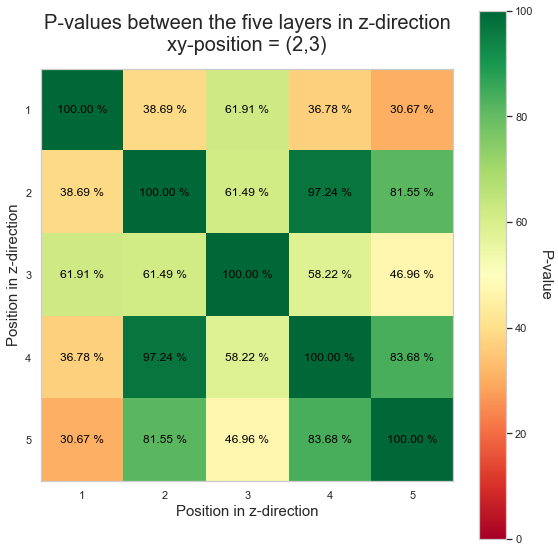

In [18]:
"""
Conduct T-test between all combinations of z-layers.

Only consider the 'reference specimen' at (2,3) in the xy-plane.

"""

## Retrieve and format data
# List of characteristics
chars = ['Flatness_HX1_Plane1',\
        'Flatness_HX1_Plane2',\
        'Flatness_HX1_Plane3',\
        'Flatness_HX1_Plane4',\
        'Flatness_HX1_Plane5',\
        'Flatness_HX1_Plane6',\
        'Flatness_HX2_Plane1',\
        'Flatness_HX2_Plane2',\
        'Flatness_HX2_Plane3',\
        'Flatness_HX2_Plane4',\
        'Flatness_HX2_Plane5',\
        'Flatness_HX2_Plane6']

# Retrieve the characteristics from the dictionary
df = func.df_from_dict(chars, char_dict)

# Concatenate dataframes
df = pd.concat(df)

# Isolate the position of the specimen
df = df[(df['x_pos'] == 2) & (df['y_pos'] == 3)]

# Extract columns of interest
df = df[['error', 'z_pos']]

# Conuct T-test and store P-values
df_p_vals = func.get_p_vals(df)

# Replace NA-values with ones and multiply show percent
df_p_vals.fillna(1, inplace=True)
df_p_vals = df_p_vals.applymap(lambda x: x*100)

# Set labels for all ticks
x_labels = df_p_vals.columns
y_labels = df_p_vals.index

# Set colormap-palette
cmap = "RdYlGn"

# Initialize figure
fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(df_p_vals, cmap=cmap, vmin=0, vmax=100)
ax.grid(False)

# Create colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("P-value", rotation=-90, va="bottom", fontsize=15)

# Show all ticks
ax.set_xticks(np.arange(len(x_labels)))
ax.set_yticks(np.arange(len(y_labels)))

# Label ticks according to table
ax.set_xticklabels(x_labels)
ax.set_yticklabels(y_labels)

# Label the axes
ax.set_xlabel('Position in z-direction', fontsize=15)
ax.set_ylabel('Position in z-direction', fontsize=15)

# Give title for plot
ax.set_title('P-values between the five layers in z-direction\n'+\
            'xy-position = (2,3)', fontsize=20, pad=18)

# Loop over data dimensions and create text annotations.
for i in range(len(x_labels)):
    for j in range(len(y_labels)):
        ax.text(j, i, "{:.2f} %".format(df_p_vals.iloc[i,j]),
               ha="center", va="center", color="black")

fig.tight_layout()
plt.show()

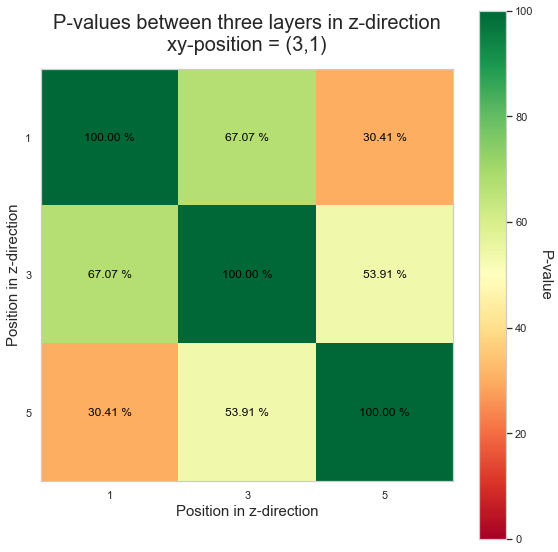

In [19]:
"""
Conduct T-test between all combinations of z-layers.

Only consider the 'reference specimen' at (3,1) in the xy-plane.

"""

## Retrieve and format data
# List of characteristics
chars = ['Flatness_HX1_Plane1',\
        'Flatness_HX1_Plane2',\
        'Flatness_HX1_Plane3',\
        'Flatness_HX1_Plane4',\
        'Flatness_HX1_Plane5',\
        'Flatness_HX1_Plane6',\
        'Flatness_HX2_Plane1',\
        'Flatness_HX2_Plane2',\
        'Flatness_HX2_Plane3',\
        'Flatness_HX2_Plane4',\
        'Flatness_HX2_Plane5',\
        'Flatness_HX2_Plane6']

# Retrieve the characteristics from the dictionary
df = func.df_from_dict(chars, char_dict)

# Concatenate dataframes
df = pd.concat(df)

# Isolate the position of the specimen
df = df[(df['x_pos'] == 3) & (df['y_pos'] == 1) & (df['angle'] == -90)]

# Extract columns of interest
df = df[['error', 'z_pos']]

# Conuct T-test and store P-values
df_p_vals = func.get_p_vals(df)

# Replace NA-values with ones and multiply show percent
df_p_vals.fillna(1, inplace=True)
df_p_vals = df_p_vals.applymap(lambda x: x*100)

# Set labels for all ticks
x_labels = df_p_vals.columns
y_labels = df_p_vals.index

# Set colormap-palette
cmap = "RdYlGn"

# Initialize figure
fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(df_p_vals, cmap=cmap, vmin=0, vmax=100)
ax.grid(False)

# Create colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("P-value", rotation=-90, va="bottom", fontsize=15)

# Show all ticks
ax.set_xticks(np.arange(len(x_labels)))
ax.set_yticks(np.arange(len(y_labels)))

# Label ticks according to table
ax.set_xticklabels(x_labels)
ax.set_yticklabels(y_labels)

# Label the axes
ax.set_xlabel('Position in z-direction', fontsize=15)
ax.set_ylabel('Position in z-direction', fontsize=15)

# Give title for plot
ax.set_title('P-values between three layers in z-direction\n'+\
            'xy-position = (3,1)', fontsize=20, pad=18)

# Loop over data dimensions and create text annotations.
for i in range(len(x_labels)):
    for j in range(len(y_labels)):
        ax.text(j, i, "{:.2f} %".format(df_p_vals.iloc[i,j]),
               ha="center", va="center", color="black")
    
fig.tight_layout()
plt.show()

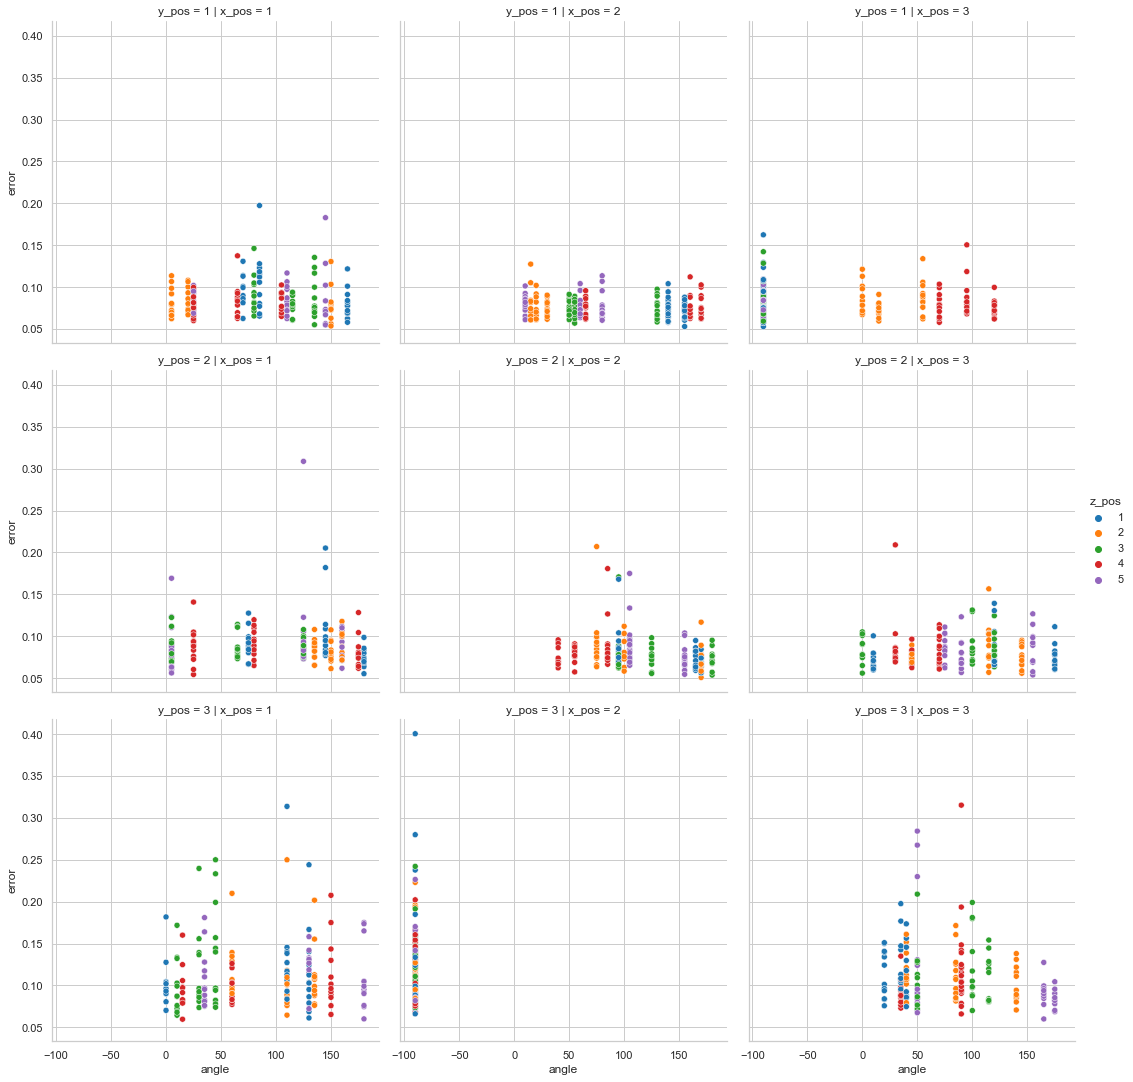

In [20]:
## Retrieve and format data
# List of characteristics
chars = ['Flatness_HX1_Plane1',\
        'Flatness_HX1_Plane2',\
        'Flatness_HX1_Plane3',\
        'Flatness_HX1_Plane4',\
        'Flatness_HX1_Plane5',\
        'Flatness_HX1_Plane6',\
        'Flatness_HX2_Plane1',\
        'Flatness_HX2_Plane2',\
        'Flatness_HX2_Plane3',\
        'Flatness_HX2_Plane4',\
        'Flatness_HX2_Plane5',\
        'Flatness_HX2_Plane6']

# Retrieve the characteristics from the dictionary
df = func.df_from_dict(chars, char_dict)

# Concatenate dataframes
df = pd.concat(df)

# Extract columns of interest
df = df[['error', 'angle', 'x_pos', 'y_pos', 'z_pos']]

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

sns.relplot(data=df, x="angle", y="error", hue='z_pos',
            col='x_pos', row='y_pos',
           palette=colors)

plt.show()

---

## Vertical planes

---

In [21]:
## Retrieve and format data
# List of characteristics
chars = ['Flatness_HX2_Plane2',\
        'Flatness_HX2_Plane5']

# Retrieve the characteristics from the dictionary
df = func.df_from_dict(chars, char_dict)

# Concatenate dataframes
df = pd.concat(df)

df.head()

,error,build,part_index,x_pos,y_pos,z_pos,angle,center_x,center_y,center_z
part_name,,,,,,,,,,
Leirmo_Exp1_Build1_#1,0.084595,1,1,1,1,1,70,70,70,50.88
Leirmo_Exp1_Build1_#10,0.071046,1,10,1,1,2,20,70,70,150.60
Leirmo_Exp1_Build1_#11,0.060714,1,11,2,1,2,15,170,70,150.60
Leirmo_Exp1_Build1_#12,0.082038,1,12,3,1,2,55,270,70,150.60
Leirmo_Exp1_Build1_#13,0.082468,1,13,1,2,2,135,70,170,150.60


<AxesSubplot:xlabel='z_pos', ylabel='error'>

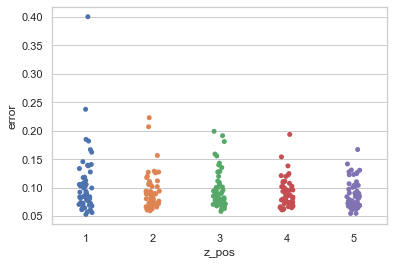

In [23]:
sns.stripplot(data=df, x='z_pos', y='error')

<AxesSubplot:xlabel='error', ylabel='Count'>

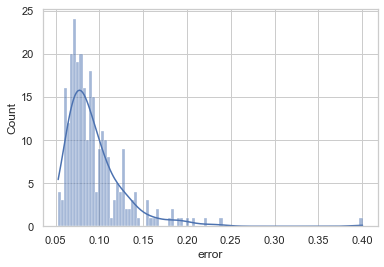

In [44]:
sns.histplot(data=df, x='error', bins=100, kde=True)

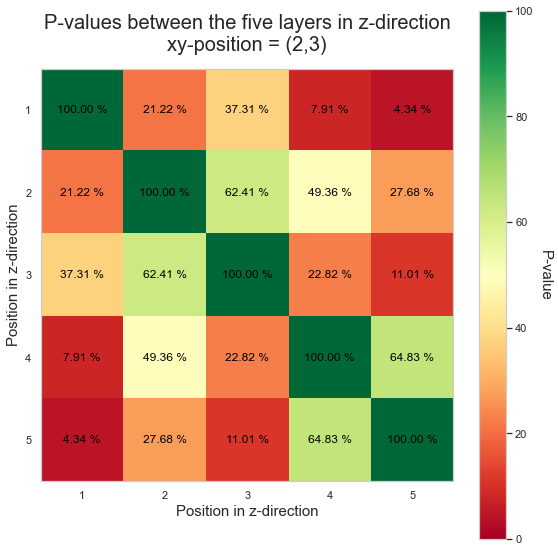

In [116]:
"""
Conduct T-test between all combinations of z-layers.

Consider all vertical planes.

"""

## Retrieve and format data
# List of characteristics
chars = ['Flatness_HX2_Plane2',\
        'Flatness_HX2_Plane5']

# Retrieve the characteristics from the dictionary
df = func.df_from_dict(chars, char_dict)

# Concatenate dataframes
df = pd.concat(df)

# Extract columns of interest
df = df[['error', 'z_pos']]

# Conuct T-test and store P-values
df_p_vals = func.get_p_vals(df)

# Replace NA-values with ones and multiply show percent
df_p_vals.fillna(1, inplace=True)
df_p_vals = df_p_vals.applymap(lambda x: x*100)

# Set labels for all ticks
x_labels = df_p_vals.columns
y_labels = df_p_vals.index

# Set colormap-palette
cmap = "RdYlGn"

# Initialize figure
fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(df_p_vals, cmap=cmap, vmin=0, vmax=100)
ax.grid(False)

# Create colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("P-value", rotation=-90, va="bottom", fontsize=15)

# Show all ticks
ax.set_xticks(np.arange(len(x_labels)))
ax.set_yticks(np.arange(len(y_labels)))

# Label ticks according to table
ax.set_xticklabels(x_labels)
ax.set_yticklabels(y_labels)

# Label the axes
ax.set_xlabel('Position in z-direction', fontsize=15)
ax.set_ylabel('Position in z-direction', fontsize=15)

# Give title for plot
ax.set_title('P-values between the five layers in z-direction\n'+\
            'xy-position = (2,3)', fontsize=20, pad=18)

# Loop over data dimensions and create text annotations.
for i in range(len(x_labels)):
    for j in range(len(y_labels)):
        ax.text(j, i, "{:.2f} %".format(df_p_vals.iloc[i,j]),
               ha="center", va="center", color="black")

fig.tight_layout()
plt.show()

In [117]:
df.reset_index(drop=True, inplace=True)

df.head()

,error,z_pos
0,0.084595,1
1,0.071046,2
2,0.060714,2
3,0.082038,2
4,0.082468,2


In [138]:
## Prepare data
# List of characteristics
chars = ['Flatness_HX2_Plane2',
         'Flatness_HX2_Plane5']

# Define list of strings to simplify column selection
levels = ["level {}".format(x) for x in range(1,6)]

# Insert a column with the name of the characteristic
for i in range(len(chars)):
    if 'char' not in char_dict[chars[i]].columns:
        char_dict[chars[i]].insert(2, 'char', chars[i])

# Retrieve the characteristics from the dictionary
df = pd.concat(char_dict[chars[i]] for i in range(len(chars)))

# Set and 'part index' as index and sort accordingly
df = df.set_index(['x_pos', 'y_pos']).sort_index()

# Split df into a list with one dataframes for each build
df_levels = [df.loc[df['z_pos'] == i] for i in range(1, 6)]

# Rename the error column to reflect build number
for i in range(5): df_levels[i] = df_levels[i].rename(columns={'error': levels[i]}).drop(columns=['z_pos'])
    
# Concatinate the list of dataframes back into a single dataframe
df_l = pd.concat(df_levels, axis=1)

# Remove duplicate columns
df_l = df_l.loc[:,~df_l.columns.duplicated()]

# Move column for 'build 1' to the others
df_l.insert(7, 'level 1', df_l.pop('level 1'))

# Calculate mean
df_l['mean'] = df_l[levels].mean(axis=1)

# Calculate difference between minimum and maximum
df_l['diff'] = df_l[levels].max(axis=1) - df_l[levels].min(axis=1)

df_l.loc[df_l['char'] == 'Flatness_HX2_Plane2', 'char'] = 'HX2_Plane2'
df_l.loc[df_l['char'] == 'Flatness_HX2_Plane5', 'char'] = 'HX2_Plane5'

df_l.head(10)

build        char  part_index  angle  center_x  center_y  \
x_pos y_pos                                                             
1     1          1  HX2_Plane2           1     70        70        70   
      1          2  HX2_Plane2           1     85        70        70   
      1          3  HX2_Plane2           1    165        70        70   
      1          1  HX2_Plane5           1     70        70        70   
      1          2  HX2_Plane5           1     85        70        70   
      1          3  HX2_Plane5           1    165        70        70   
      2          1  HX2_Plane2           4    145        70       170   
      2          2  HX2_Plane2           4    180        70       170   
      2          3  HX2_Plane2           4     75        70       170   
      2          1  HX2_Plane5           4    145        70       170   

             center_z   level 1   level 2   level 3   level 4   level 5  \
x_pos y_pos                                                               
1     1         50.88  0.084595  0.071046  0.080737  0.078511  0.081222   
      1         50.88  0.105779  0.066573  0.076504  0.066539  0.065264   
      1         50.88  0.069072  0.062814  0.135426  0.093392  0.054788   
      1         50.88  0.099434  0.093163  0.089327  0.083219  0.101963   
      1         50.88  0.118279  0.080485  0.079998  0.099600  0.100621   
      1         50.88  0.083881  0.073442  0.069593  0.102488  0.071083   
      2         50.88  0.088876  0.082468  0.070810  0.074453  0.077062   
      2         50.88  0.070989  0.083568  0.111520  0.119681  0.077448   
      2         50.88  0.127601  0.117698  0.098573  0.101623  0.110362   
      2         50.88  0.181935  0.092116  0.092022  0.073878  0.072496   

                 mean      diff  
x_pos y_pos                      
1     1      0.079222  0.013549  
      1      0.076132  0.040514  
      1      0.083098  0.080638  
      1      0.093421  0.018744  
      1      0.095797  0.038281  
      1      0.080097  0.032895  
      2      0.078734  0.018066  
      2      0.092641  0.048692  
      2      0.111171  0.029028  
      2      0.102489  0.109440

In [141]:
df_l[levels + ['mean', 'diff']].describe()

,level 1,level 2,level 3,level 4,level 5,mean,diff
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,0.104644,0.093710,0.096776,0.089911,0.087698,0.094548,0.054769
std,0.055572,0.031782,0.033028,0.025317,0.024961,0.024226,0.050230
min,0.052950,0.059441,0.058330,0.060803,0.054538,0.063893,0.011309
25%,0.071951,0.073234,0.076536,0.072325,0.068809,0.078640,0.025433
50%,0.088348,0.088711,0.084912,0.084803,0.078242,0.087961,0.041132
75%,0.116436,0.104522,0.104658,0.101218,0.102372,0.110861,0.063584
max,0.400476,0.222995,0.199056,0.193571,0.167091,0.176043,0.328619


<AxesSubplot:ylabel='error'>

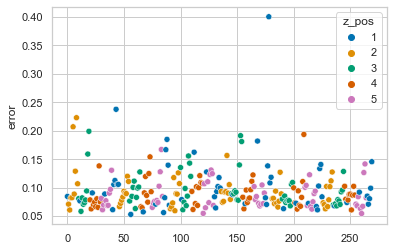

In [59]:
sns.scatterplot(x=df.index, y=df['error'], hue=df['z_pos'], palette='colorblind')

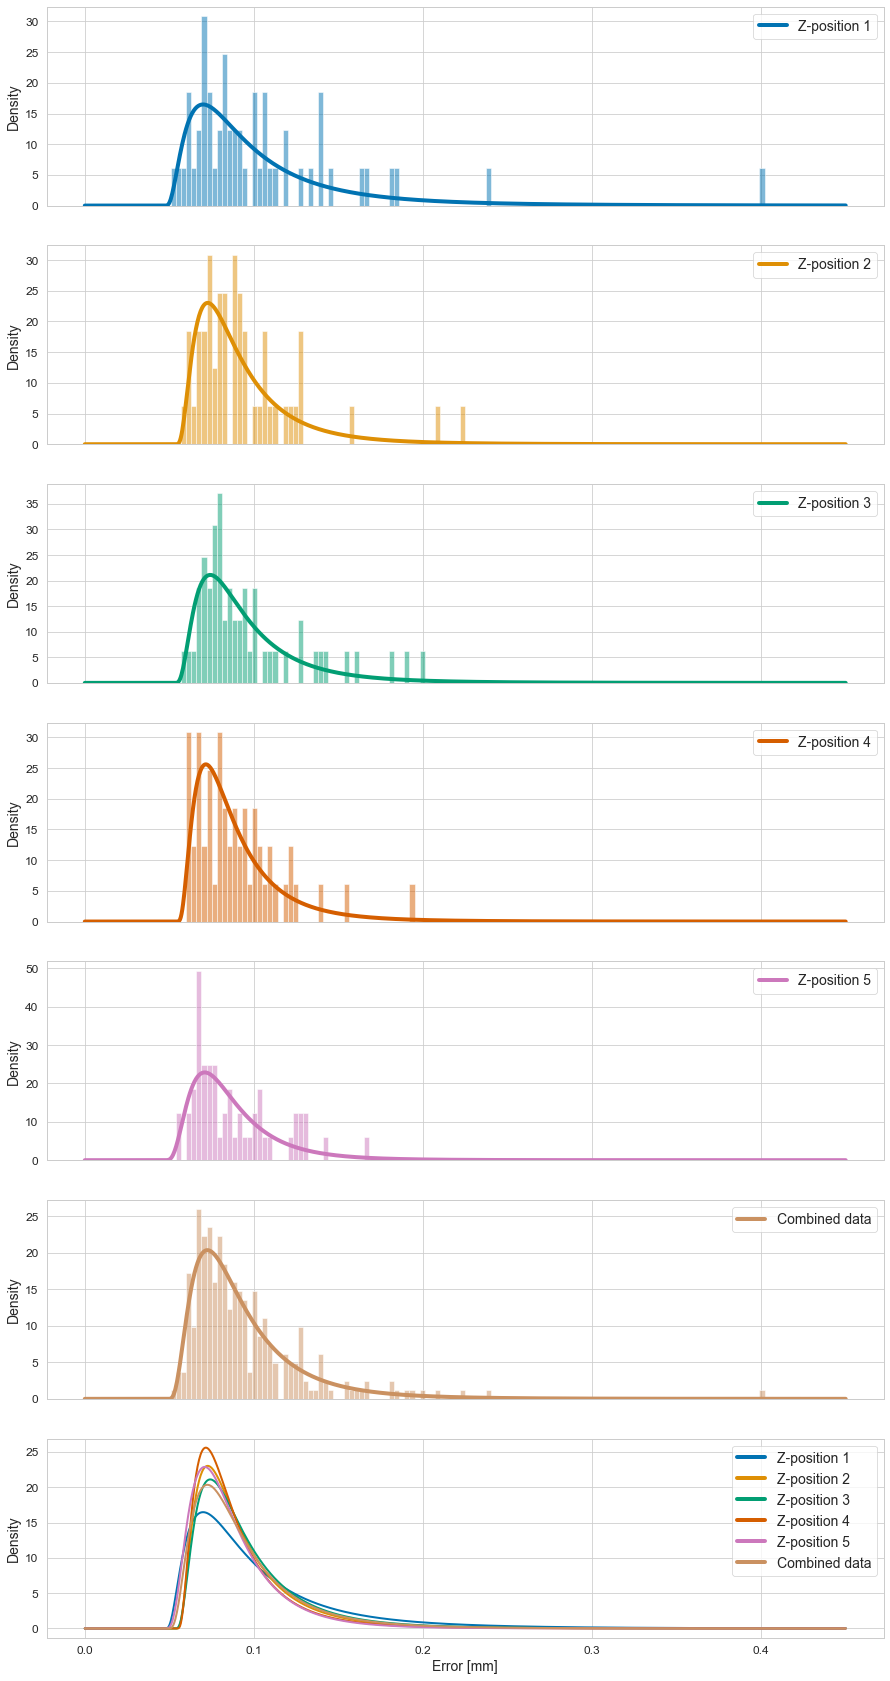

In [74]:
## Define function for retrieving the frozen distribution
def calc_pdf(x, data):
    return stats.lognorm.pdf(x, *stats.lognorm.fit(data))


## Set parameters
# Seaborn theme
sns.set_theme(context='paper', style='whitegrid')

# Range for x-axis
xr = 0.45

# Array for x-axis
x = np.linspace(0, xr, 1000)

# Number of bins for histograms
b = 150

# Transperency for histograms
a = 0.5

# Define colors
colors = sns.color_palette('colorblind')

# Define the characteristics
chars = ["Flatness_HX2_Plane2", "Flatness_HX2_Plane5"]

# Definition for font size
large = 24
medium = 18
small = 14
x_small = 12


## Create figure
# Initialize a figure with subplots
fig, axs = plt.subplots(nrows=7, ncols=1, figsize=(15, 30), sharex=True)

# Initialize legend
legend_elements = []


# Iterate all characteristics and plot them seperately
for i in range(5):
    # Find the probability density function for fitted lognormal distribution
    pdf = calc_pdf(x, df.loc[df['z_pos'] == i+1, 'error'])
        
    # Plot the distribution
    sns.lineplot(x=x, y=pdf, ax=axs[i], linewidth=4, color=colors[i])
    sns.lineplot(x=x, y=pdf, ax=axs[6], linewidth=2, color=colors[i])
    sns.histplot(df.loc[df['z_pos'] == i+1, 'error'], stat='density', bins=b, binrange=(0, xr), ax=axs[i], color=colors[i], alpha=a)
    
    line = Line2D([0], [0], color=colors[i], lw=4, label="Z-position {}".format(i+1))
    axs[i].legend(handles=[line], loc='upper right', fontsize=small)
    legend_elements.append(line)
    

line = Line2D([0], [0], color=colors[5], lw=4, label='Combined data')
axs[5].legend(handles=[line], loc='upper right', fontsize=small)
legend_elements.append(line)

# Find the probability density function for fitted lognormal distribution
pdf = calc_pdf(x, df['error'])

# Plot the aggregated data
sns.lineplot(x=x, y=pdf, ax=axs[5], linewidth=4, color=colors[5])
sns.lineplot(x=x, y=pdf, ax=axs[6], linewidth=2, color=colors[5])
sns.histplot(df['error'], stat='density', bins=b, binrange=(0, xr), ax=axs[5], alpha=a, color=colors[5])

    
axs[6].legend(handles=legend_elements, loc='upper right', fontsize=small)


for ax in axs:
    ax.set_ylabel("Density", fontsize=small)
    ax.set_xlabel("Error [mm]", fontsize=small)
    ax.tick_params(labelsize=x_small)


# plt.savefig("plots/50.0_Difference between z-layers.jpg", dpi=300, bbox_inches='tight')


## Display plot
plt.show()

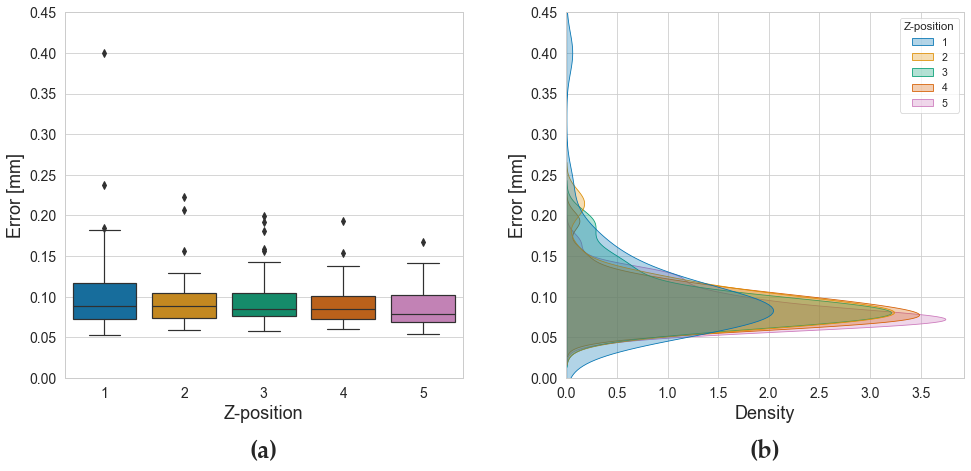

In [112]:
# Seaborn theme
sns.set_theme(context='paper', style='whitegrid')

# Definition for font size
large = 24
medium = 18
small = 14
x_small = 12

# Define font
pfont = {'fontname':'Palatino Linotype'}

# Initialize figure
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,7.5))

# Configure layout spacing
fig.tight_layout(pad=8.0)

# Set context with Seaborn
sns.set_context('paper', font_scale=1.2)


## PLOT 1
# Boxplot for the first frame
sns.boxplot(ax=axs[0], data=df, y='error', x='z_pos', palette='colorblind')

# Set label for the x-axis
axs[0].set_xlabel("Z-position", fontsize=medium)

# Add letter below plot
plt.text(x=0.5, y=-0.2, s="(a)", fontsize=large, weight='bold', **pfont,
         horizontalalignment='center',
         verticalalignment='center',
         transform=axs[0].transAxes)


## PLOT 2
# Kernel density estimation for second frame
sns.kdeplot(ax=axs[1], data=df, y='error', hue='z_pos', fill=True, alpha=.3, palette='colorblind', legend=True)

# Set the label for the x-axis
axs[1].set_xlabel("Density", fontsize=medium)

# Add letter below plot
plt.text(x=0.5, y=-0.2, s="(b)", fontsize=large, weight='bold', **pfont,
         horizontalalignment='center',
         verticalalignment='center',
         transform=axs[1].transAxes)

leg = axs[1].get_legend()
leg.set_title("Z-position")

for ax in axs:
    # Set label for y-axis
    ax.set_ylabel("Error [mm]", fontsize=medium)
    
    # Set the label size for both axes
    ax.tick_params(labelsize=small)
    
    # Set the limits of the y-axis
    ax.set_ylim(ymin=0, ymax=0.45)

    
# plt.savefig("plots/51.0_Variation_between_z-positions_for_vertical_planes.jpg", dpi=300, bbox_inches='tight')

    
## Display plot
plt.show()

In [105]:
# function to calculate correlation

def linear_correlation(df_name):
    
    df = pd.DataFrame(index=df_name.columns, columns=df_name.columns)
    
    for column_y in df_name.columns:
        
        for column_x in df_name.columns:
            
            df[column_y][column_x] = (df_name[column_y].corr(df_name[column_x]))
            
           
        
           
    return df.astype('float64')

In [108]:
df_t = df[['error', 'z_pos']]

df_t = linear_correlation(df_t)

df_t

,error,z_pos
error,1.000000,-0.147719
z_pos,-0.147719,1.000000
